# Анализа скупа података "GasHisSDB" у оквиру дипл. рада

### Каришић Ђорђе 657/2019 - Вештачка интелигенција

#### Скупу података приступити путем [овог линка](https://paperswithcode.com/dataset/gashissdb). Примарна литература и поставка задатка на [овом линку](https://arxiv.org/pdf/2106.02473v6.pdf).

#### Jupyter Notebook верзија, изворни код ће бити "wrap"-ован у виртуелно окружење са предефинисаним зависностима:


In [1]:
import re
with open('requirements.txt',encoding='iso-8859-1') as f:
    [print(re.sub(r'[^A-Za-z0-9\=\-\.]+', '', line),end='\n') for line in f.readlines()]

absl-py==1.4.0

astunparse==1.6.3

cachetools==5.3.1

certifi==2023.5.7

charset-normalizer==3.2.0

contourpy==1.1.0

cycler==0.11.0

flatbuffers==23.5.26

fonttools==4.41.0

gast==0.4.0

google-auth==2.22.0

google-auth-oauthlib==1.0.0

google-pasta==0.2.0

grpcio==1.56.0

h5py==3.9.0

idna==3.4

keras==2.13.1

keras-tuner==1.3.5

kiwisolver==1.4.4

kt-legacy==1.0.5

libclang==16.0.0

Markdown==3.4.3

MarkupSafe==2.1.3

matplotlib==3.7.2

numpy==1.24.3

oauthlib==3.2.2

opt-einsum==3.3.0

packaging==23.1

pandas==2.0.3

Pillow==10.0.0

protobuf==4.23.4

pyasn1==0.5.0

pyasn1-modules==0.3.0

pyparsing==3.0.9

python-dateutil==2.8.2

pytz==2023.3

requests==2.31.0

requests-oauthlib==1.3.1

rsa==4.9

six==1.16.0

tensorboard==2.13.0

tensorboard-data-server==0.7.1

tensorflow==2.13.0

tensorflow-estimator==2.13.0

tensorflow-intel==2.13.0

tensorflow-io-gcs-filesystem==0.31.0

termcolor==2.3.0

typingextensions==4.5.0

tzdata==2023.3

urllib3==1.26.16

Werkzeug==2.3.6

wrapt==1.15.0




Структура радног окружења се састоји из виртуелног окружења, Notebook-ова и осталог.

In [2]:
from PIL import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import product
import os

print(f"Радни директоријум: {os.getcwd()}")    
print("Путање до фајлова и датотека у оквиру радне датотеке:",*[f"*{file}*" for file in os.listdir(os.getcwd())\
                                                                if not file.endswith('.png')],\
                                                                  sep='\n')


Радни директоријум: D:\Diplomski
Путање до фајлова и датотека у оквиру радне датотеке:
*.ipynb_checkpoints*
*analiza_podataka_dipl_rad.ipynb*
*analysis.py*
*diplomski*
*GasHisSDB*
*memory_opt_analysis.py*
*requirements.txt*


Потребно изоловати све датотеке које садрже податке који чине овај скуп података.

In [3]:
types = ["Normal","Abnormal"]
folders = ["80","120","160"]
images = []
paths = [f"{folder}/{image_type}" for folder, image_type in product(folders, types)]
print("Путање до датотека које садрже скупове података:",*[f"GasHisSDB/{p}/*назив неке слике*" for p in paths], sep='\n')

Путање до датотека које садрже скупове података:
GasHisSDB/80/Normal/*назив неке слике*
GasHisSDB/80/Abnormal/*назив неке слике*
GasHisSDB/120/Normal/*назив неке слике*
GasHisSDB/120/Abnormal/*назив неке слике*
GasHisSDB/160/Normal/*назив неке слике*
GasHisSDB/160/Abnormal/*назив неке слике*


Приказ сваког типа и класе слика из скупа података.

GasHisSDB/80/Normal/Normal-00001.png
GasHisSDB/80/Abnormal/Abnormal-00001.png
GasHisSDB/120/Normal/Normal-00001.png
GasHisSDB/120/Abnormal/Abnormal-00001.png
GasHisSDB/160/Normal/Normal-00001.png
GasHisSDB/160/Abnormal/Abnormal-00001.png


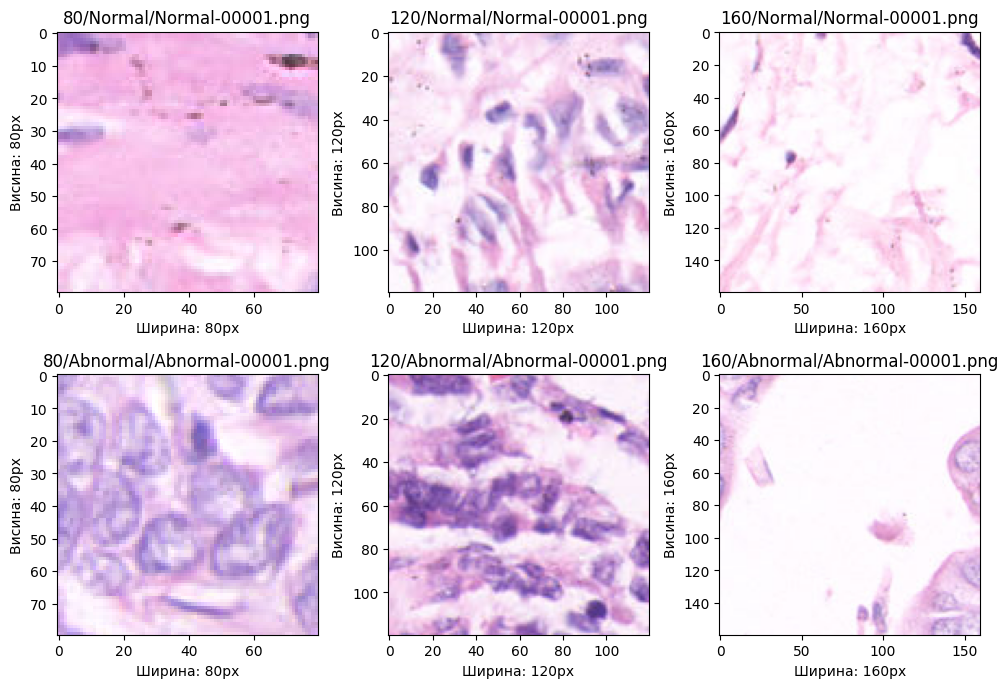

In [4]:
fig, axes = plt.subplots(2, 3, figsize=(10, 7))
for j in range(axes.shape[1]): 
    for i in range(axes.shape[0]): 
        index = j * axes.shape[0] + i  
        if index >= len(paths):  
            break
        print(f"GasHisSDB/{paths[index]}/{paths[index].split('/')[1]}-00001.png")
        image = Image.open(f"GasHisSDB/{paths[index]}/{paths[index].split('/')[1]}-00001.png")
        ax = axes[i, j] 
        ax.imshow(image)
        ax.set_title(f"{paths[index]}/{paths[index].split('/')[1]}-00001.png")
        width, height = image.size
        ax.set_xlabel(f"Ширина: {width}px")
        ax.set_ylabel(f"Висина: {height}px")
plt.tight_layout()
plt.show()

Графички приказ величине скупа података подељеног на основу резолуције и распоређености класа.

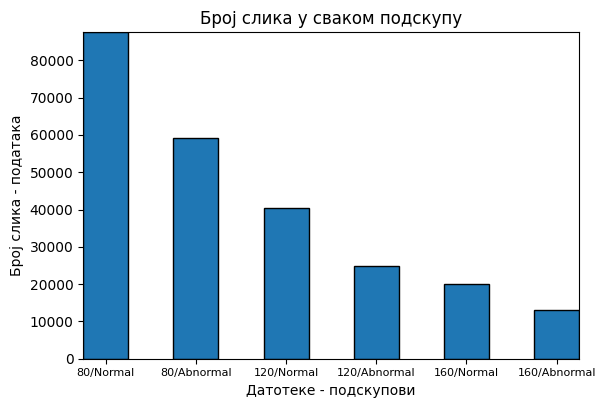

['Normal', 'Abnormal']


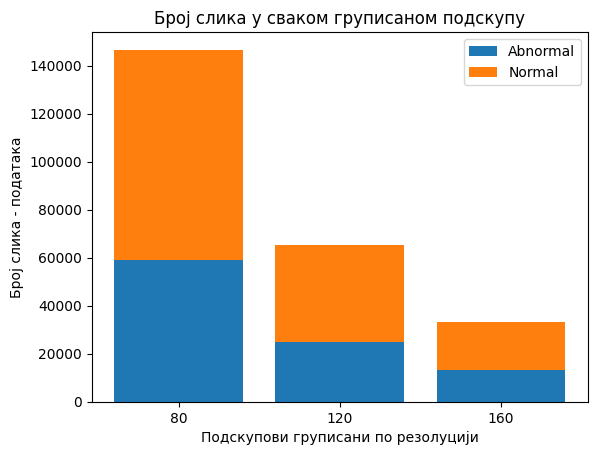

In [10]:
el_count = {}

for path in paths:
    files = os.listdir(f"GasHisSDB/{path}")
    file_count = len(files)
    el_count[path] = file_count

folder_names = list(el_count.keys())
counts = list(el_count.values())

bar_width = 0.5
bar_padding =2.0

bar_positions = range(len(folder_names))

plt.bar(bar_positions, counts, width=bar_width, align='center', edgecolor='black')

plt.xticks(bar_positions, folder_names)
plt.tick_params(axis='x', labelsize=8)
plt.margins(0.0)
plt.subplots_adjust(bottom=0.2)
plt.xlabel('Датотеке - подскупови')
plt.ylabel('Број слика - података')
plt.title('Број слика у сваком подскупу')
plt.show()

#или на други начин

res = [str(x) for x in sorted([int(x) for x in list(set([x.split("/")[0] for x in paths]))])]
tp = list(set([x.split("/")[1] for x in paths]))
plt.bar(res,[x for ind, x in enumerate(counts) if ind%2])
plt.bar(res,[x for ind, x in enumerate(counts) if not ind%2], bottom=[x for ind, x in enumerate(counts) if ind%2])
plt.legend(tp[::-1])
plt.xlabel('Подскупови груписани по резолуцији')
plt.ylabel('Број слика - података')
plt.title('Број слика у сваком груписаном подскупу')

plt.show()

Скупови података нису уравнотежени, треба водити рачуна приликом поделе тренинг, тест, валидација.

In [6]:
import os
import cv2
#рефактористање листе која представља фодлере и подфолдере
root = 'GasHisSDB'
resolutions = ['80','120','160']
datasets = {res: {'images': [], 'labels': []} for res in resolutions}
for res in resolutions:
    rootres = os.path.join(root, res)
    for folder in ['Abnormal', 'Normal']:
        folder_path = os.path.join(rootres, folder)
        label = 0 if folder == 'Abnormal' else 1  #abnormal=0, normal=1
        
        for image_file in os.listdir(folder_path):
            image_path = os.path.join(folder_path, image_file)
            
            image = cv2.imread(image_path)
            image = cv2.resize(image, (int(res), int(res)))
            
            datasets[res]['images'].append(image)
            datasets[res]['labels'].append(label)

PART 4


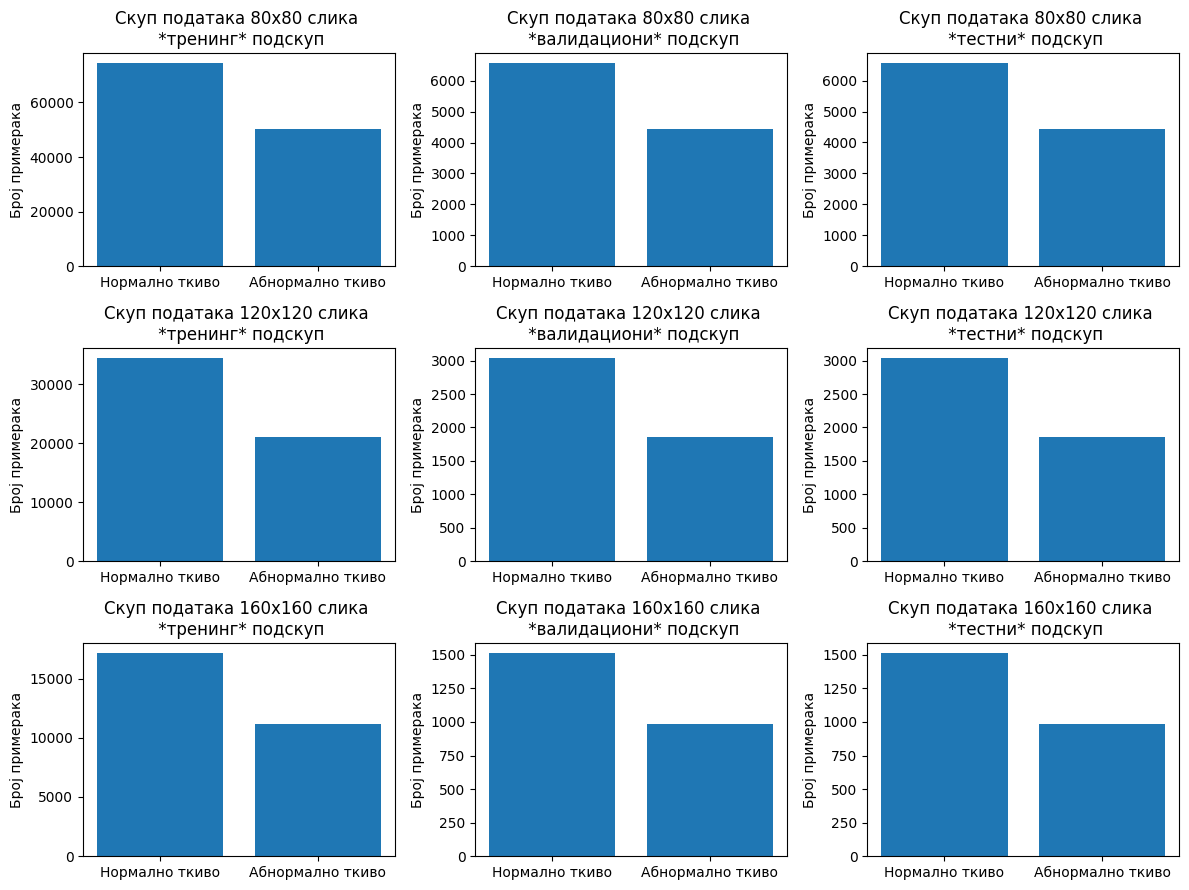

[[[[0.8667 0.706  0.929 ]
   [0.8354 0.6704 0.886 ]
   [0.859  0.682  0.902 ]
   ...
   [0.5527 0.357  0.4902]
   [0.698  0.4314 0.569 ]
   [0.784  0.4707 0.6157]]

  [[0.796  0.5845 0.859 ]
   [0.816  0.604  0.8667]
   [0.8706 0.6587 0.9136]
   ...
   [0.5215 0.3098 0.447 ]
   [0.678  0.4119 0.549 ]
   [0.8037 0.498  0.643 ]]

  [[0.816  0.5806 0.859 ]
   [0.886  0.651  0.9253]
   [0.8433 0.6313 0.8667]
   ...
   [0.5767 0.3372 0.4785]
   [0.682  0.4158 0.5527]
   [0.788  0.506  0.647 ]]

  ...

  [[0.906  0.753  0.902 ]
   [0.8784 0.706  0.8667]
   [0.8667 0.655  0.8394]
   ...
   [0.9097 0.8    0.89  ]
   [0.937  0.851  0.9214]
   [0.953  0.859  0.929 ]]

  [[0.9097 0.7373 0.898 ]
   [0.8823 0.6904 0.894 ]
   [0.8315 0.639  0.8823]
   ...
   [0.961  0.8354 0.929 ]
   [0.992  0.886  0.949 ]
   [0.9766 0.8706 0.933 ]]

  [[0.9175 0.749  0.9253]
   [0.89   0.698  0.9097]
   [0.8237 0.6196 0.8706]
   ...
   [0.929  0.8037 0.902 ]
   [0.9688 0.859  0.937 ]
   [0.9688 0.859  0.937 ]]]


 

In [7]:
import math
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

root = 'GasHisSDB'
resolutions = ['80', '120', '160']
datasets = {res: {'images': [], 'labels': []} for res in resolutions}

# Function to load and process images in batches
def process_images_batch(image_paths, batch_size, resolution):
    batch_images = []
    for i in range(0, len(image_paths), batch_size):
        batch_image_paths = image_paths[i:i + batch_size]
        batch_images.extend(process_images(batch_image_paths, resolution))
    return np.array(batch_images)

def process_images(image_paths, resolution):
    batch_images = []
    for image_path in image_paths:
        image = cv2.imread(image_path)
        image = cv2.resize(image, (int(resolution), int(resolution)))
        image = image.astype('float32') / 255.0  # Convert to float before resizing
        batch_images.append(image)
    return np.array(batch_images) # Convert to a single large array

for res in resolutions:
    root_res = os.path.join(root, res)
    for folder in ['Abnormal', 'Normal']:
        folder_path = os.path.join(root_res, folder)
        label = 0 if folder == 'Abnormal' else 1  # abnormal=0, normal=1

        image_files = os.listdir(folder_path)
        image_paths = [os.path.join(folder_path, image_file) for image_file in image_files]
        num_images = len(image_paths)
        batch_size = 100  # Adjust the batch size according to available memory

        for i in range(0, num_images, batch_size):
            batch_image_paths = image_paths[i:i+batch_size]
            batch_images = process_images(batch_image_paths,res)

            datasets[res]['images'].extend(batch_images)
            datasets[res]['labels'].extend([label] * len(batch_images))
            del batch_images
    # Convert images and labels to NumPy arrays with smaller data type
    datasets[res]['images'] = np.array(datasets[res]['images'], dtype=np.float16)
    datasets[res]['labels'] = np.array(datasets[res]['labels'], dtype=np.uint8)
    
#del batch_images
split_ratio = 0.15  # 70/15/15

for val,res in enumerate(resolutions):
    images = datasets[res]['images']
    labels = datasets[res]['labels']

    # Split the dataset into training and (test + validation) sets
    X_train, X_temp, y_train, y_temp = train_test_split(images, labels, test_size=split_ratio, stratify=labels, random_state=42)

    # Split validation and test sets
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)
    # Normalize the images
    # Assign the normalized images to the respective resolution
    datasets[res]['X_train'] = X_train
    #print(X_train,datasets[res]['X_train'])
    datasets[res]['X_val'] = X_val
    datasets[res]['X_test'] = X_test
    datasets[res]['y_train'] = y_train
    datasets[res]['y_val'] = y_val
    datasets[res]['y_test'] = y_test

    # Free up memory after processing each resolution
    del datasets[res]['images']
    del datasets[res]['labels']

print(f"PART {len(resolutions)+1}")
# Plotting the bar chart
subset_labels = ['train', 'val', 'test']
srb_labels = ['тренинг', 'валидациони', 'тестни']

# Create a grid layout for the subplots
fig, axes = plt.subplots(nrows=len(resolutions), ncols=len(subset_labels), figsize=(12, 9))

# Iterate over each dataset and its subsets to plot the bar plots
for i, res in enumerate(resolutions):
    for j, subset_label in enumerate(subset_labels):
        # Count the number of normal and abnormal images in the subset
        subset_labels_data = datasets[res]['y_'+subset_label]
        num_normal = sum(subset_labels_data == 1)
        num_abnormal = sum(subset_labels_data == 0)
        
        # Plot the bar plot for the current subset
        axes[i, j].bar(['Нормално ткиво', 'Абнормално ткиво'], [num_normal, num_abnormal])
        axes[i, j].set_title(f'Скуп података {res}x{res} слика \n *{srb_labels[j]}* подскуп')
        axes[i, j].set_ylabel('Број примерака')
# Adjust the spacing between subplots
plt.tight_layout()
# Show the plot
plt.show()
print(datasets['80']['X_train'])

Потребно извршити нормализацију података. Остатак кода дат .py датотеком због потребе РАМ меморије (преко 25 гигабајта потребно).